# 3º Trabalho de avaliação de visão computacional

Dados:
- Nome: Guilherme Guy de Andrade
- Matrícula: 22/0004641

## Repositório do projeto
- [https://github.com/guilherme1guy/computer_vision](https://github.com/guilherme1guy/computer_vision)


# Questões teóricas

## Questão 1

*Prove a invariância de I1 ou I2 como mostrados nos slides em aula. (Sugestão: suponha 5 linhas em um plano e faça com que quatro triângulos envolvidos no invariante tenham um lado sobre uma mesma linha, e então use a definição de razão cruzada para a prova)*

**Resposta:**

-

## Questão 2

*Explique as razões que fazem cada hipótese do algoritmo EIGENSPACE_IDENTIF ser necessária (Sugestão para a hipótese 4: considere duas imagens diferentes, I1 e I2, tal que o mínimo valor em I2 seja maior do que o máximo valor em I1. A correlação entre I1 e I2 é maior do que a autocorrelação de I1 , ainda que I2 não possa ser mais similar a I1 do que a própria I1.*


**Resposta:**

As hipóteses para o algortimo EIGENSPACE_IDENTIF são:
1 - Cada imagem contém um único objeto
2 - Os objetos são visualizados por uma câmera fixa sob perspectiva fraca
3 - As imagens são normalizadas no tamanho, isto é, o quadro da imagem é o menor retângulo envolvendo os limites da imagem do objeto
4 - A energia dos valores de pixel de cada imagem é normalizada em 1
5 - O objeto é completamente visível e não ocluso em todas as imagens

Inicialmente é necessário o entendimento de que o algoritmo EIGENSPACE_IDENTIF é um algoritmo utilizado para reconhecer um objeto em um espaço vetorial que foi criado a partir de diferentes imagens. As hipóteses servem para garantir, na realidade, a criação do autoespaço pelo algoritmo EIGENSPACE_LEARN, e a comparação correta de novas imagens com objetos representados nesse autoespaço. A ideia de mapear os objetos em um autoespaço é reduzir a complexidade de comparação, de algo 2D para um vetor 1D, que represente o objeto. Esse vetor 1D é formado empilhando as linhas da imagem em um único vetor. Depois disso podemos encontrar, por exemplo, a correlação entre dois vetores, que representa a similaridade entre dois objetos. Ao representar os objetos no autoespaço podemos utilizar algumas técnicas para eliminar valores que não são importantes para a comparação, de forma a diminuir o espaço de busca.

- Como o algoritmo opera com a imagem toda, a **hipótese 1** serve para evitar que ele considere dois objetos como parte de um mesmo objeto na hora de elaborar o autoespaço.
- A **hipótese 2** é importante para garantir que a câmera não esteja muito próxima do objeto, o que pode gerar distorções na imagem, além de manter um ponto de referência da câmera fixo.
- A **hipótese 3** é importante para garantir que o as diferentes imagens sejam comparáveis, gerando vetores de mesmo tamanho e que possam ser convertidos para o mesmo autoespaço.
- A **hipótese 4** ajuda a evitar que diferenças de intensidade nas imagens, por exemplo causadas por mudanças de iluminação, atrapalhem a elaboração do autoespaço nem comparações.
- Já a **hipótese 5** é importante para garantir que se tenha a vista completa do objeto, já que o que estiver causando a oclusão será considerado parte dele ao elaborar o autoespaço, o que é indesejado.

## Questão 3

*Qual é a diferença exata entre aplicar a transformação rígida R(x + T) e Rx + T a um par de vetores u, v? Mostre isso matematicamente. Visualize seus resultados movendo um objeto real no espaço com uma função do MatLab (ou outra linguagem) para plotar em 3D. Você pode imaginar casos em que o resultado é o mesmo independente da ordem de aplicação de rotação e translação? Demonstre com resultados.*

**Resposta:**

Neste caso, a ordem dos acontecimentos influencia o resultado final. A transformação `R(x + T)` faz a translação e depois a rotação, ou seja, o objeto será transladado para a posição de destino, com base na sua rotação atual, e depois rotacionado ao redor de seu centro por R. Já a transformação `Rx + T` faz a rotação e depois a translação, ou seja, o objeto será rotacionado ao redor de seu centro por `R` e depois transladado para a posição de destino, de forma que `T` será aplicado na direção de `R` e não na direção original do objeto.

Observe a diferença na imagem abaixo, gerada com o editor 3D da ferramenta [Three.js](https://threejs.org/editor/))]:

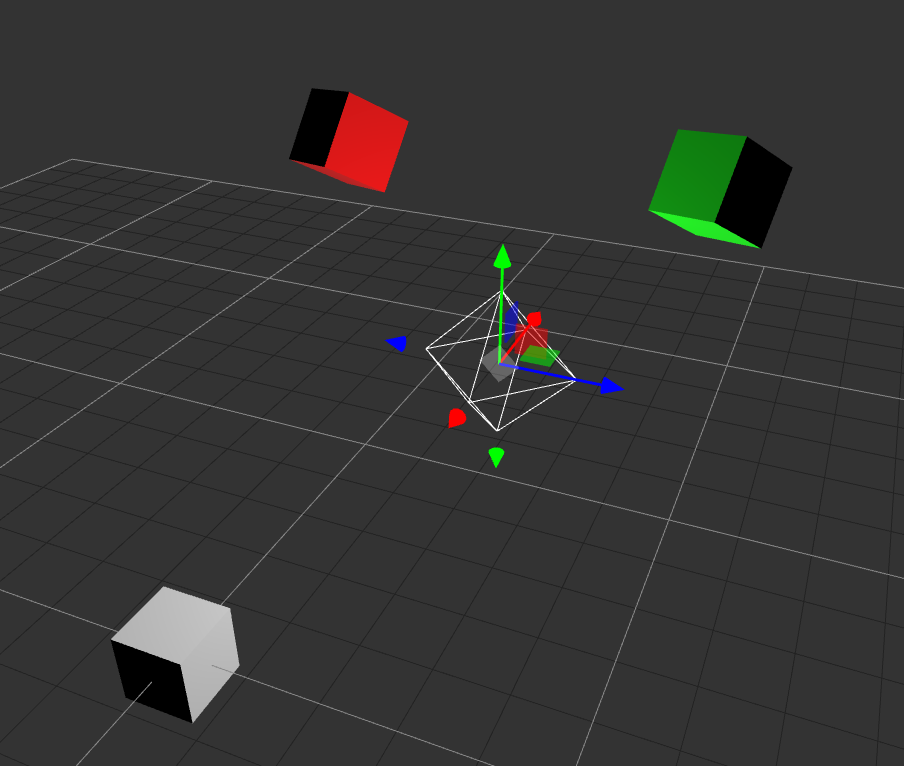

O cubo branco é a posição original, o cubo vermelho é a posição após a transformação `Rx + T` e o cubo verde é a posição após a transformação `R(x + T)`.

Neste exemplo, temos:

```python
R = (45, 45, 45)   # uma rotação de 45 graus em cada eixo
T = (5, 5, 5)      # uma translação de 5 unidades em cada eixo

```

Um caso em que o resultado é o mesmo independente da ordem de aplicação de rotação e translação é quando não há translação ou rotação no movimento. Ou então quando a translação é aplicada em um eixo que não seja modificado pela rotação.